**Experiment 2: Binary Classification using Na¨ıve Bayes and K-Nearest Neighbors**

**1. Load the dataset**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/spambase_csv_Kaggle.csv')
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


**2. Data Preprocessing**

In [ ]:
#Checking missing values
print(df.isnull().sum()) #No null vals so no need to handle

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

**3. Exploraratory Data Analysis**

In [ ]:
print(df.shape)
print(df.info())
print(df.describe())

(4601, 58)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report      

**4. Visualize class distribution and feature behavior**

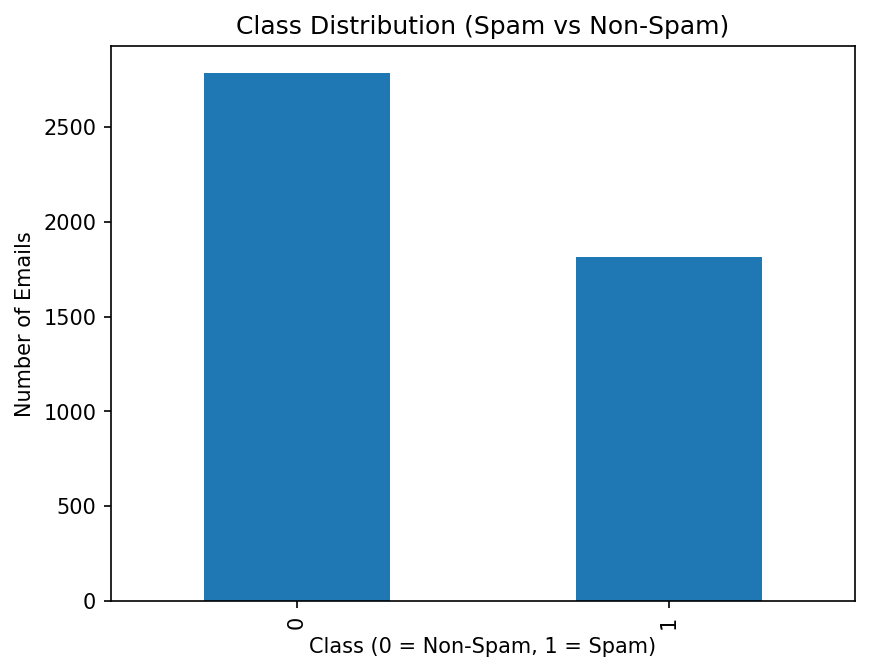

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=150)
df['class'].value_counts().plot(kind='bar')
plt.title("Class Distribution (Spam vs Non-Spam)")
plt.xlabel("Class (0 = Non-Spam, 1 = Spam)")
plt.ylabel("Number of Emails")
plt.savefig('class_distribution.png') # Add download option
plt.show()

<Figure size 1800x900 with 0 Axes>

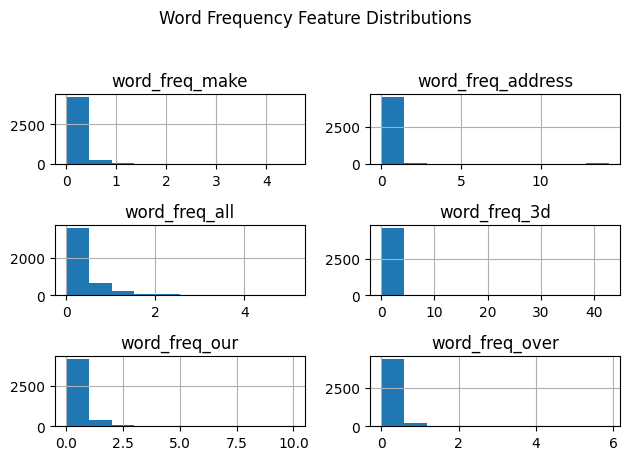

In [ ]:
import matplotlib.pyplot as plt

# Select word frequency features
word_freq_cols = [col for col in df.columns if col.startswith('word_freq')]

# Plot first 6 word frequency features
plt.figure(figsize=(12,6), dpi=150)
df[word_freq_cols[:6]].hist()
plt.suptitle("Word Frequency Feature Distributions")
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
plt.savefig('word_freq_distributions.png') # Add download option
plt.show()

<Figure size 1800x900 with 0 Axes>

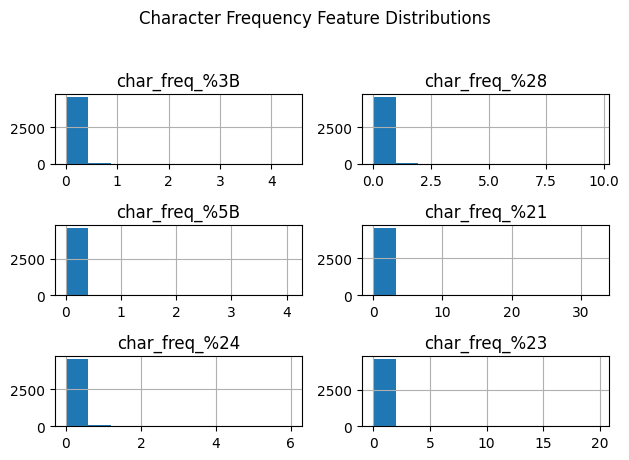

In [ ]:
import matplotlib.pyplot as plt

char_freq_cols = [col for col in df.columns if col.startswith('char_freq')]

plt.figure(figsize=(12,6), dpi=150)
df[char_freq_cols].hist()
plt.suptitle("Character Frequency Feature Distributions")
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
plt.savefig('char_freq_distributions.png') # Add download option
plt.show()

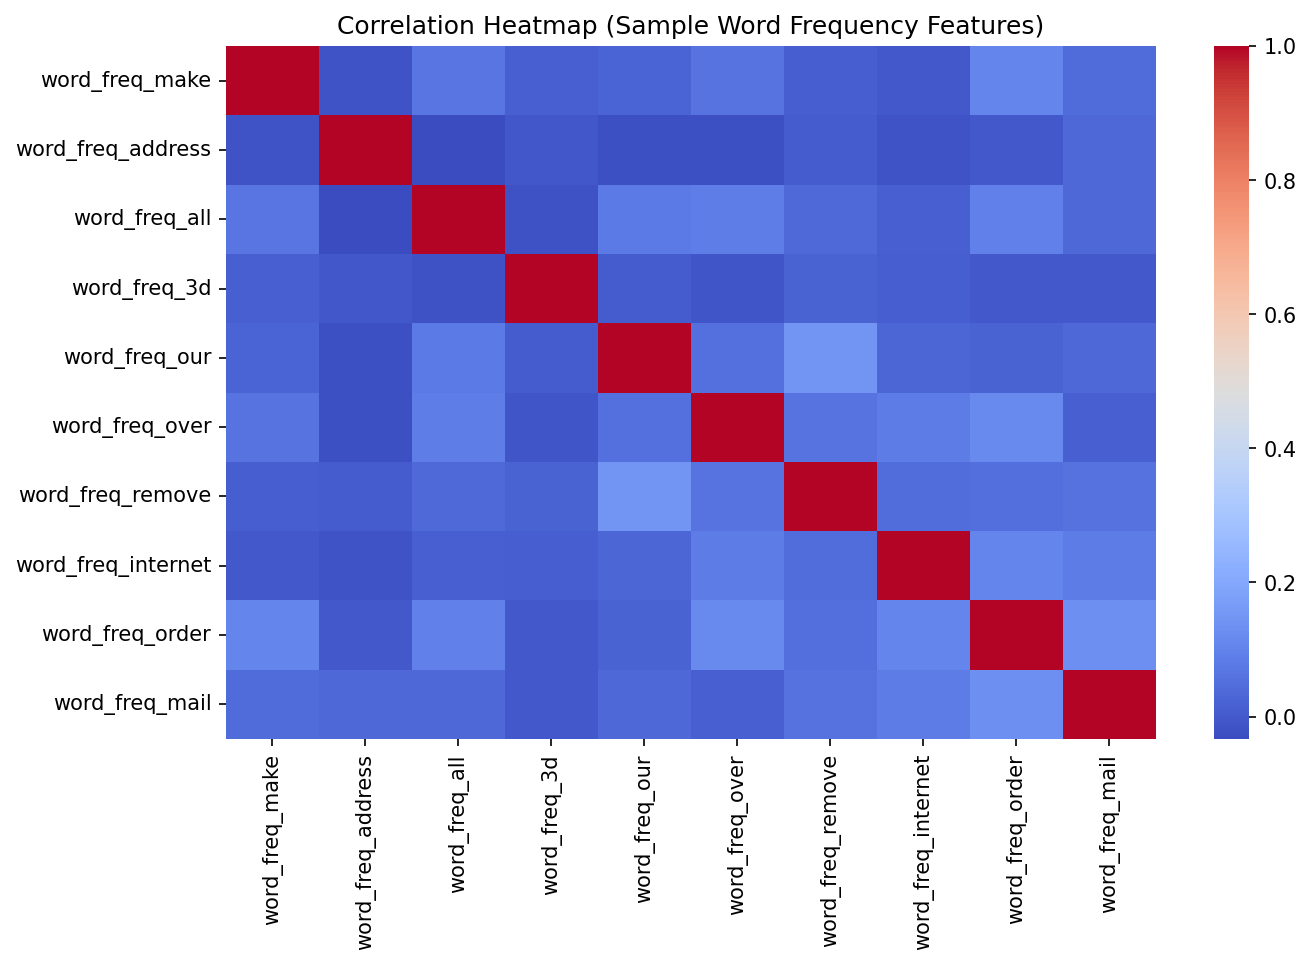

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6), dpi=150)
sns.heatmap(df[word_freq_cols[:10]].corr(), cmap='coolwarm')
plt.title("Correlation Heatmap (Sample Word Frequency Features)")
plt.savefig('correlation_heatmap.png')
plt.show()

**5.  Split the dataset into training and testing sets**


In [ ]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (3680, 57)
Testing data shape: (921, 57)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Create scaler object
scaler = StandardScaler()

# Fit ONLY on training data
X_train_scaled = scaler.fit_transform(X_train)

# Apply same scaling to test data
X_test_scaled = scaler.transform(X_test)

**6. Train Naive Bayes variants**


In [ ]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

y_pred_gnb = gnb.predict(X_test_scaled)

print("Gaussian Naive Bayes")
print(confusion_matrix(y_test, y_pred_gnb))
print(classification_report(y_test, y_pred_gnb))

Gaussian Naive Bayes
[[419 139]
 [ 15 348]]
              precision    recall  f1-score   support

           0       0.97      0.75      0.84       558
           1       0.71      0.96      0.82       363

    accuracy                           0.83       921
   macro avg       0.84      0.85      0.83       921
weighted avg       0.87      0.83      0.83       921



In [ ]:
#Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train)      # unscaled data

y_pred_mnb = mnb.predict(X_test)

print("Multinomial Naive Bayes")
print(confusion_matrix(y_test, y_pred_mnb))
print(classification_report(y_test, y_pred_mnb))


Multinomial Naive Bayes
[[458 100]
 [106 257]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       558
           1       0.72      0.71      0.71       363

    accuracy                           0.78       921
   macro avg       0.77      0.76      0.77       921
weighted avg       0.78      0.78      0.78       921



In [ ]:
#Bernoulli NB
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train, y_train)

y_pred_bnb = bnb.predict(X_test)

print("Bernoulli Naive Bayes")
print(confusion_matrix(y_test, y_pred_bnb))
print(classification_report(y_test, y_pred_bnb))


Bernoulli Naive Bayes
[[515  43]
 [ 71 292]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       558
           1       0.87      0.80      0.84       363

    accuracy                           0.88       921
   macro avg       0.88      0.86      0.87       921
weighted avg       0.88      0.88      0.88       921



**ROC CURVES**


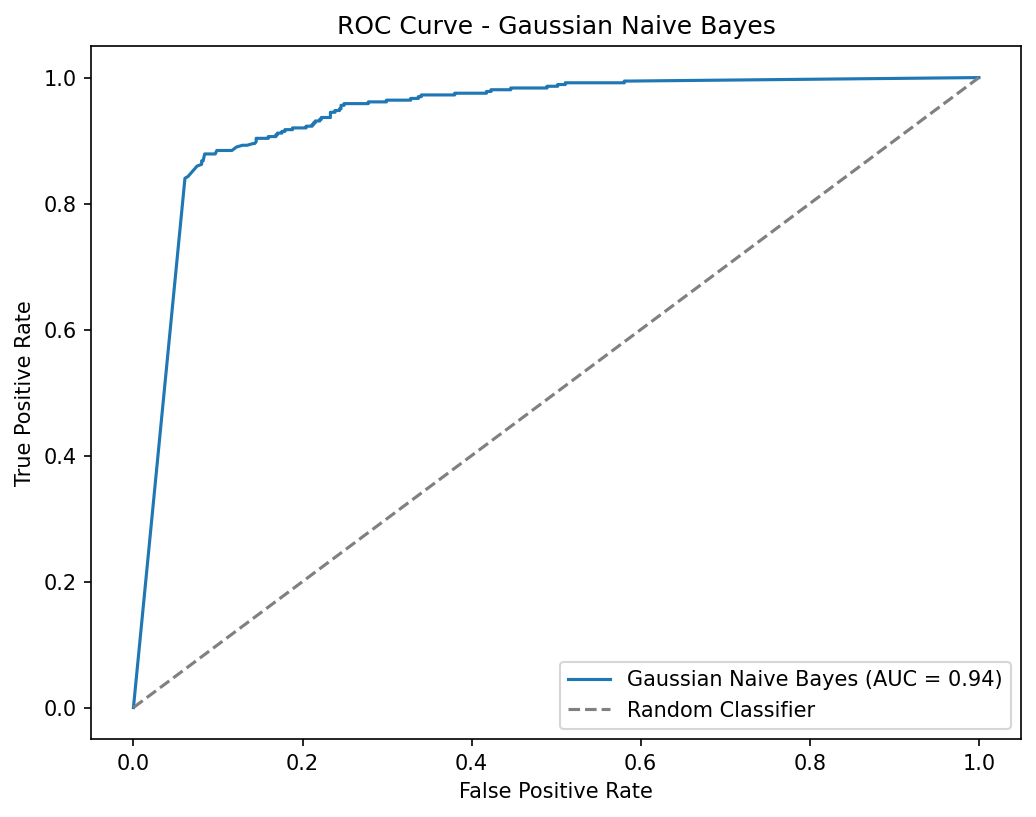

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 1. Gaussian Naive Bayes (gnb)
# Predict probabilities for the positive class
y_prob_gnb = gnb.predict_proba(X_test_scaled)[:, 1]

# Calculate FPR, TPR, and AUC
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_prob_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

# Plot ROC curve
plt.figure(figsize=(8, 6), dpi=150)
plt.plot(fpr_gnb, tpr_gnb, label=f'Gaussian Naive Bayes (AUC = {roc_auc_gnb:.2f})')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gaussian Naive Bayes')
plt.legend()
plt.savefig('roc_curve_gaussian_nb.png') # Add download option
plt.show()

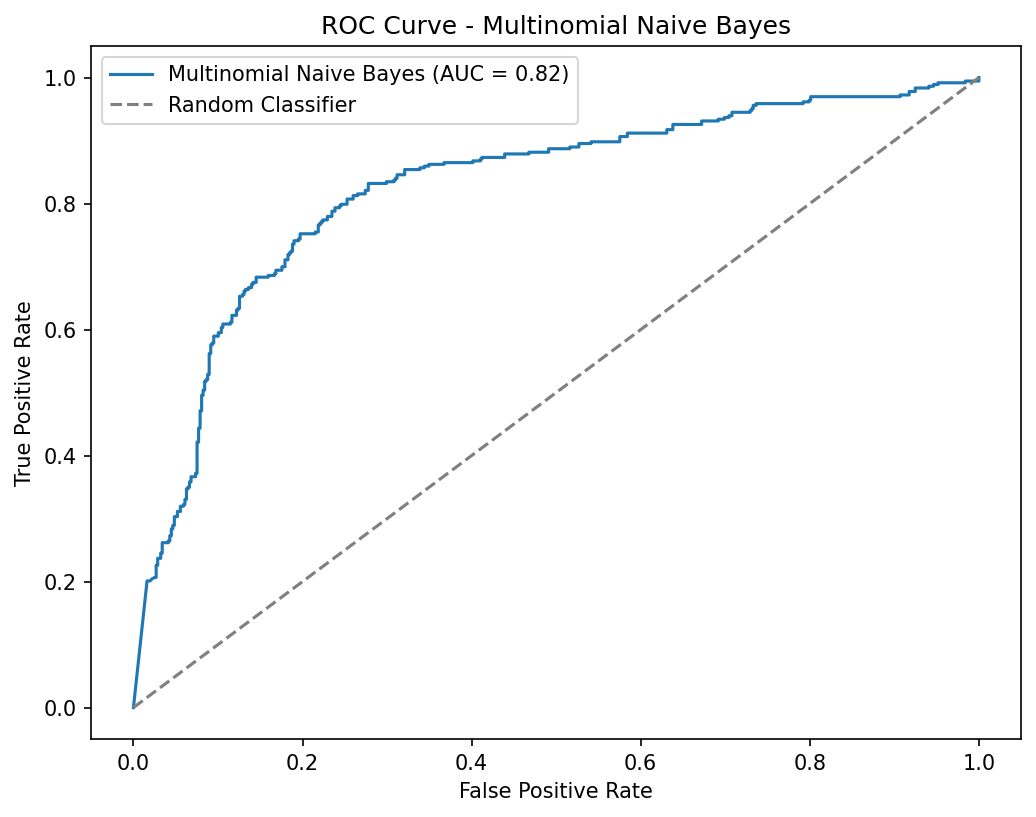

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 2. Multinomial Naive Bayes (mnb)
# Predict probabilities for the positive class (using unscaled data)
y_prob_mnb = mnb.predict_proba(X_test)[:, 1]

# Calculate FPR, TPR, and AUC
fpr_mnb, tpr_mnb, _ = roc_curve(y_test, y_prob_mnb)
roc_auc_mnb = auc(fpr_mnb, tpr_mnb)

# Plot ROC curve
plt.figure(figsize=(8, 6), dpi=150)
plt.plot(fpr_mnb, tpr_mnb, label=f'Multinomial Naive Bayes (AUC = {roc_auc_mnb:.2f})')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multinomial Naive Bayes')
plt.legend()
plt.savefig('roc_curve_multinomial_nb.png') # Add download option
plt.show()

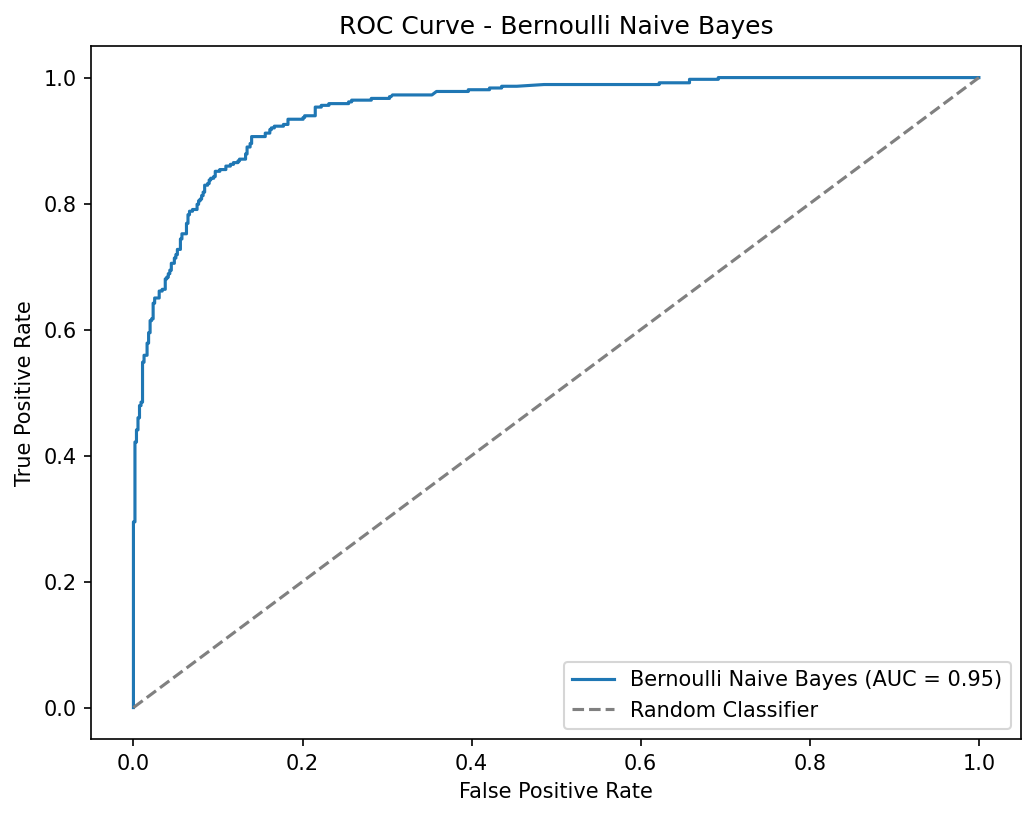

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 3. Bernoulli Naive Bayes (bnb)
# Predict probabilities for the positive class (using unscaled data)
y_prob_bnb = bnb.predict_proba(X_test)[:, 1]

# Calculate FPR, TPR, and AUC
fpr_bnb, tpr_bnb, _ = roc_curve(y_test, y_prob_bnb)
roc_auc_bnb = auc(fpr_bnb, tpr_bnb)

# Plot ROC curve
plt.figure(figsize=(8, 6), dpi=150)
plt.plot(fpr_bnb, tpr_bnb, label=f'Bernoulli Naive Bayes (AUC = {roc_auc_bnb:.2f})')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Bernoulli Naive Bayes')
plt.legend()
plt.savefig('roc_curve_bernoulli_nb.png') # Add download option
plt.show()

**CONFUSION MATRICES**

In [ ]:
import time
from sklearn.metrics import confusion_matrix

# --- Gaussian Naive Bayes Metrics ---

# Measure training time
start_time = time.time()
gnb.fit(X_train_scaled, y_train)
train_time_gnb = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_pred_gnb = gnb.predict(X_test_scaled)
pred_time_gnb = time.time() - start_time

# Calculate Confusion Matrix
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
tn_gnb, fp_gnb, fn_gnb, tp_gnb = cm_gnb.ravel()

# Calculate Specificity and False Positive Rate
specificity_gnb = tn_gnb / (tn_gnb + fp_gnb)
fpr_gnb_metric = fp_gnb / (tn_gnb + fp_gnb)

print("Gaussian Naive Bayes Evaluation:")
print(f"Training Time: {train_time_gnb:.4f} seconds")
print(f"Prediction Time: {pred_time_gnb:.4f} seconds")
print(f"Specificity: {specificity_gnb:.4f}")
print(f"False Positive Rate: {fpr_gnb_metric:.4f}")
print("Confusion Matrix:")
print(cm_gnb)


Gaussian Naive Bayes Evaluation:
Training Time: 0.0060 seconds
Prediction Time: 0.0013 seconds
Specificity: 0.7509
False Positive Rate: 0.2491
Confusion Matrix:
[[419 139]
 [ 15 348]]


In [ ]:
import time
from sklearn.metrics import confusion_matrix

# --- Multinomial Naive Bayes Metrics ---

# Measure training time
start_time = time.time()
mnb.fit(X_train, y_train) # mnb uses unscaled data
train_time_mnb = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_pred_mnb = mnb.predict(X_test) # mnb uses unscaled data
pred_time_mnb = time.time() - start_time

# Calculate Confusion Matrix
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
tn_mnb, fp_mnb, fn_mnb, tp_mnb = cm_mnb.ravel()

# Calculate Specificity and False Positive Rate
specificity_mnb = tn_mnb / (tn_mnb + fp_mnb)
fpr_mnb_metric = fp_mnb / (tn_mnb + fp_mnb)

print("Multinomial Naive Bayes Evaluation:")
print(f"Training Time: {train_time_mnb:.4f} seconds")
print(f"Prediction Time: {pred_time_mnb:.4f} seconds")
print(f"Specificity: {specificity_mnb:.4f}")
print(f"False Positive Rate: {fpr_mnb_metric:.4f}")
print("Confusion Matrix:")
print(cm_mnb)

Multinomial Naive Bayes Evaluation:
Training Time: 0.0061 seconds
Prediction Time: 0.0025 seconds
Specificity: 0.8208
False Positive Rate: 0.1792
Confusion Matrix:
[[458 100]
 [106 257]]


In [ ]:
import time
from sklearn.metrics import confusion_matrix

# --- Bernoulli Naive Bayes Metrics ---

# Measure training time
start_time = time.time()
bnb.fit(X_train, y_train) # bnb uses unscaled data
train_time_bnb = time.time() - start_time

# Measure prediction time
start_time = time.time()
y_pred_bnb = bnb.predict(X_test) # bnb uses unscaled data
pred_time_bnb = time.time() - start_time

# Calculate Confusion Matrix
cm_bnb = confusion_matrix(y_test, y_pred_bnb)
tn_bnb, fp_bnb, fn_bnb, tp_bnb = cm_bnb.ravel()

# Calculate Specificity and False Positive Rate
specificity_bnb = tn_bnb / (tn_bnb + fp_bnb)
fpr_bnb_metric = fp_bnb / (tn_bnb + fp_bnb)

print("Bernoulli Naive Bayes Evaluation:")
print(f"Training Time: {train_time_bnb:.4f} seconds")
print(f"Prediction Time: {pred_time_bnb:.4f} seconds")
print(f"Specificity: {specificity_bnb:.4f}")
print(f"False Positive Rate: {fpr_bnb_metric:.4f}")
print("Confusion Matrix:")
print(cm_bnb)

Bernoulli Naive Bayes Evaluation:
Training Time: 0.0111 seconds
Prediction Time: 0.0032 seconds
Specificity: 0.9229
False Positive Rate: 0.0771
Confusion Matrix:
[[515  43]
 [ 71 292]]


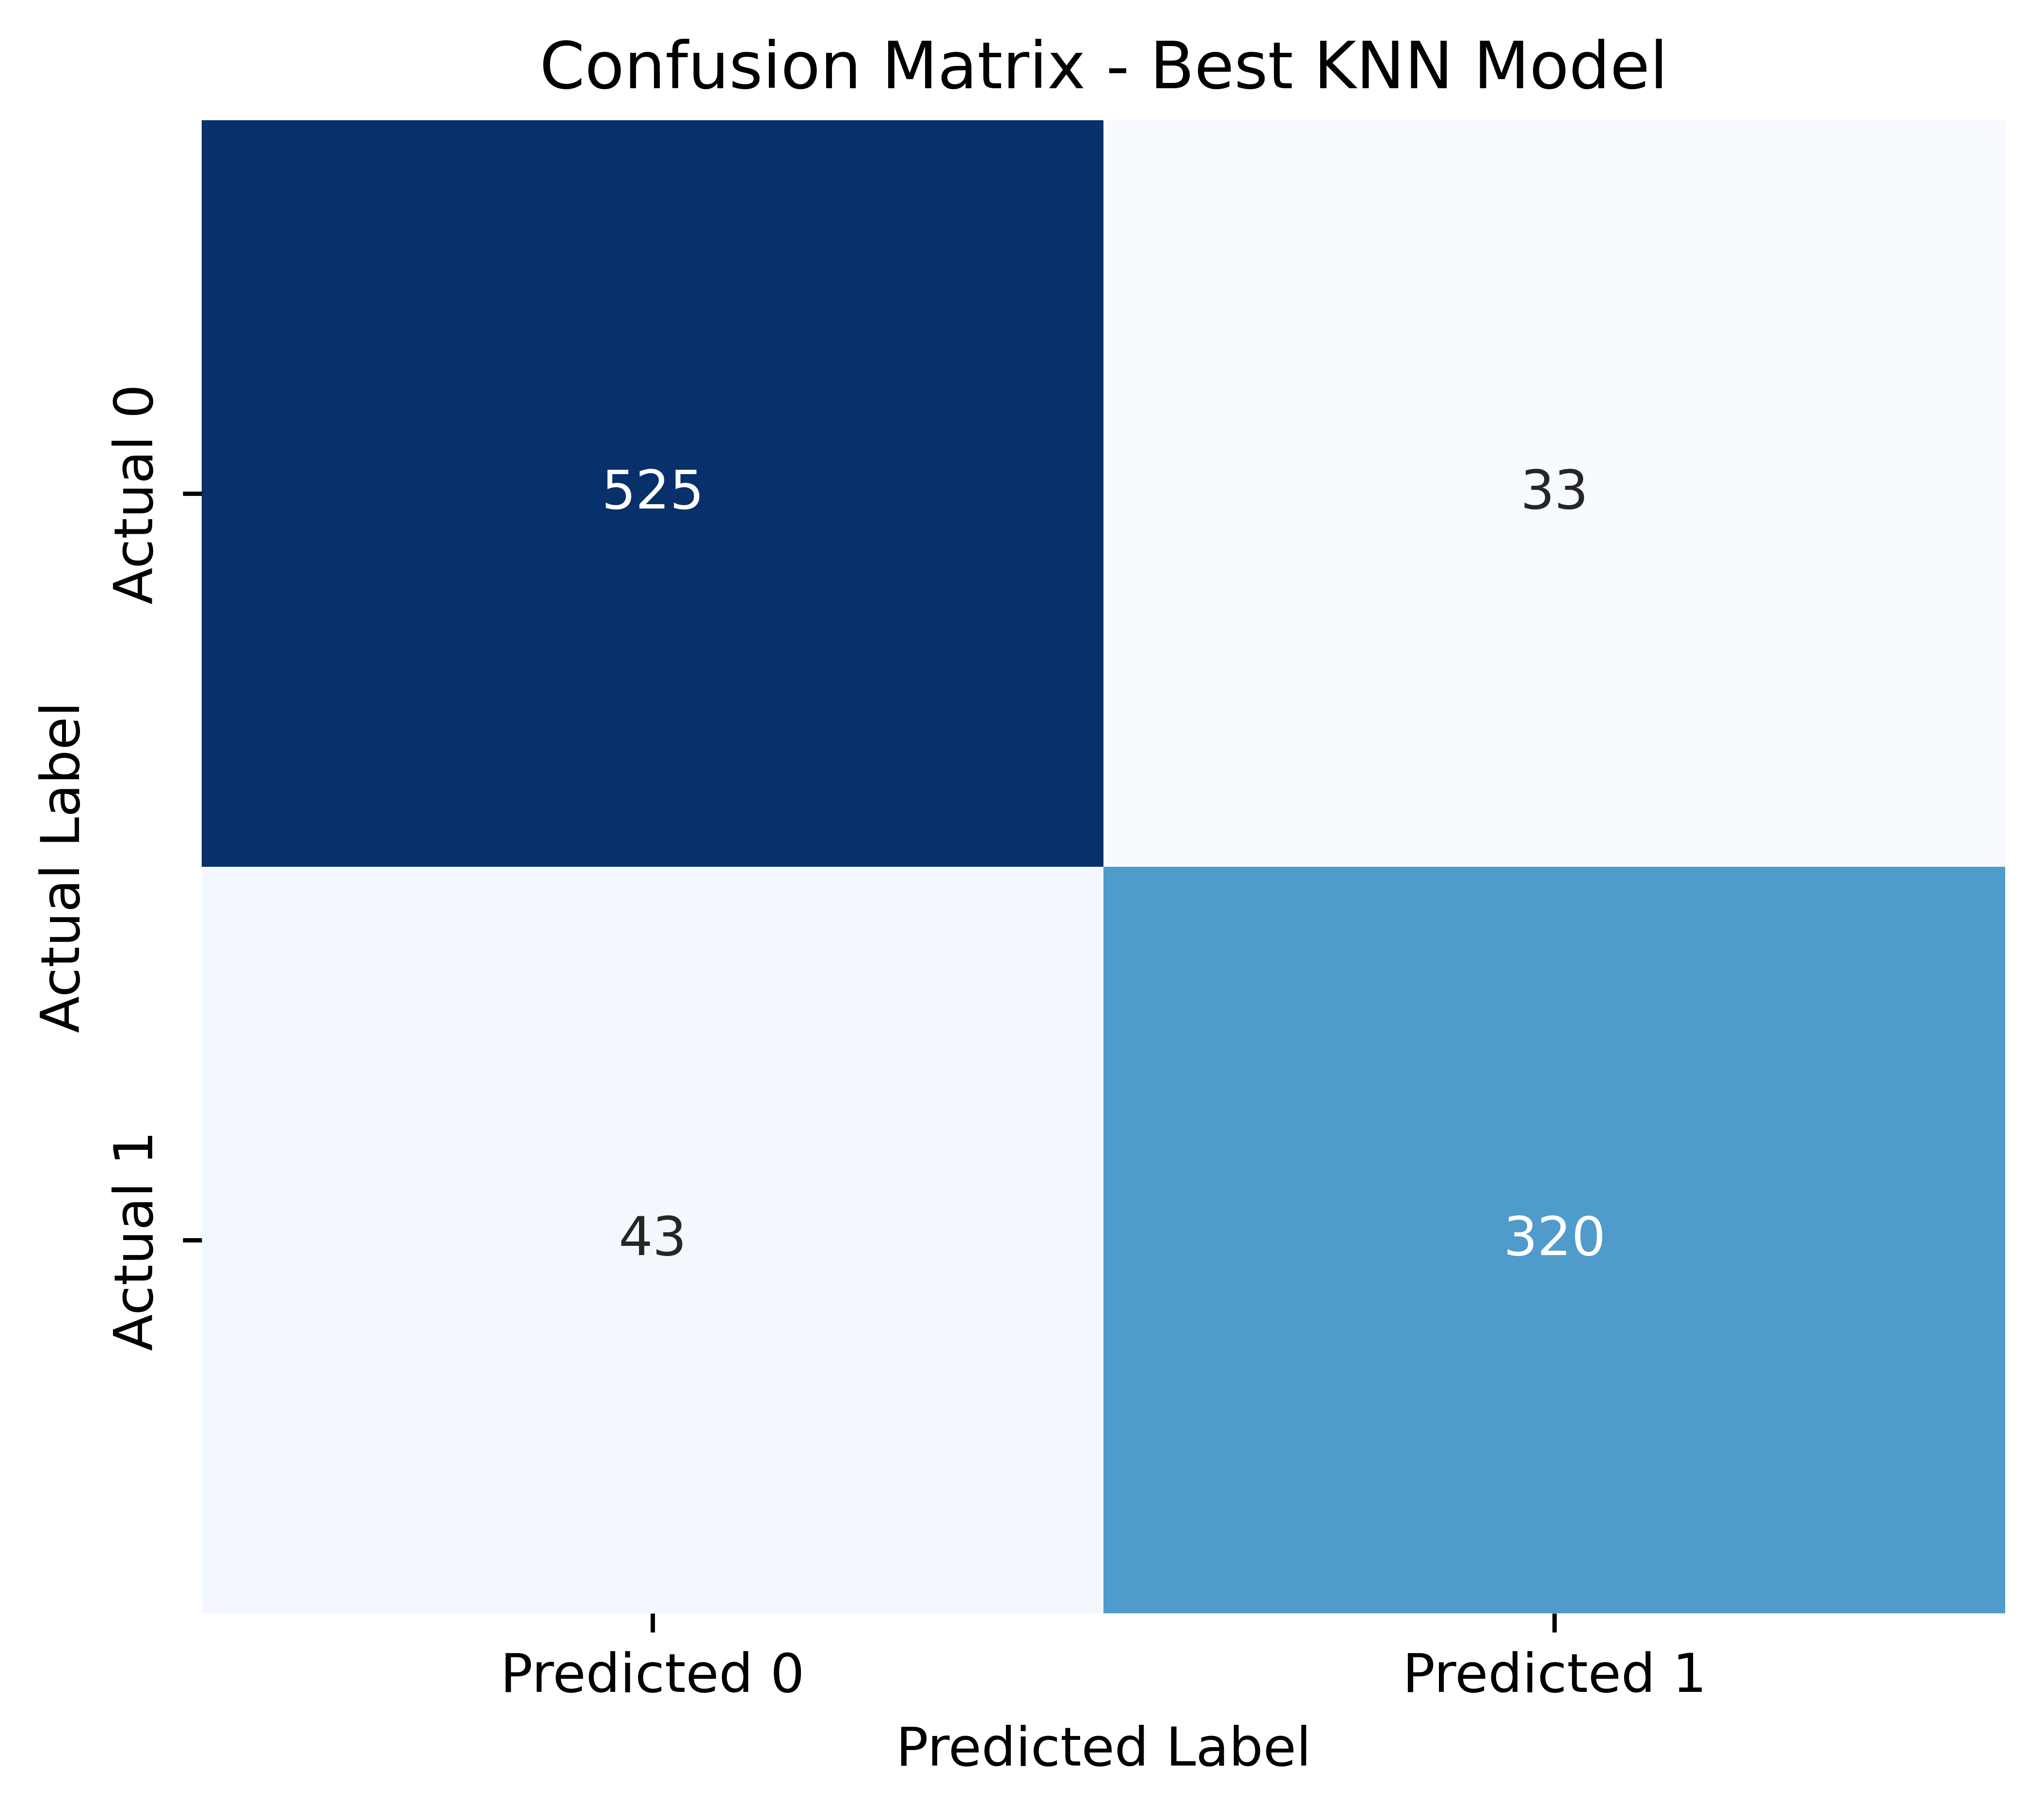

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix for Best KNN Model
plt.figure(figsize=(6, 5), dpi=800)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Best KNN Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix_best_knn.png') # Save as image
plt.show()

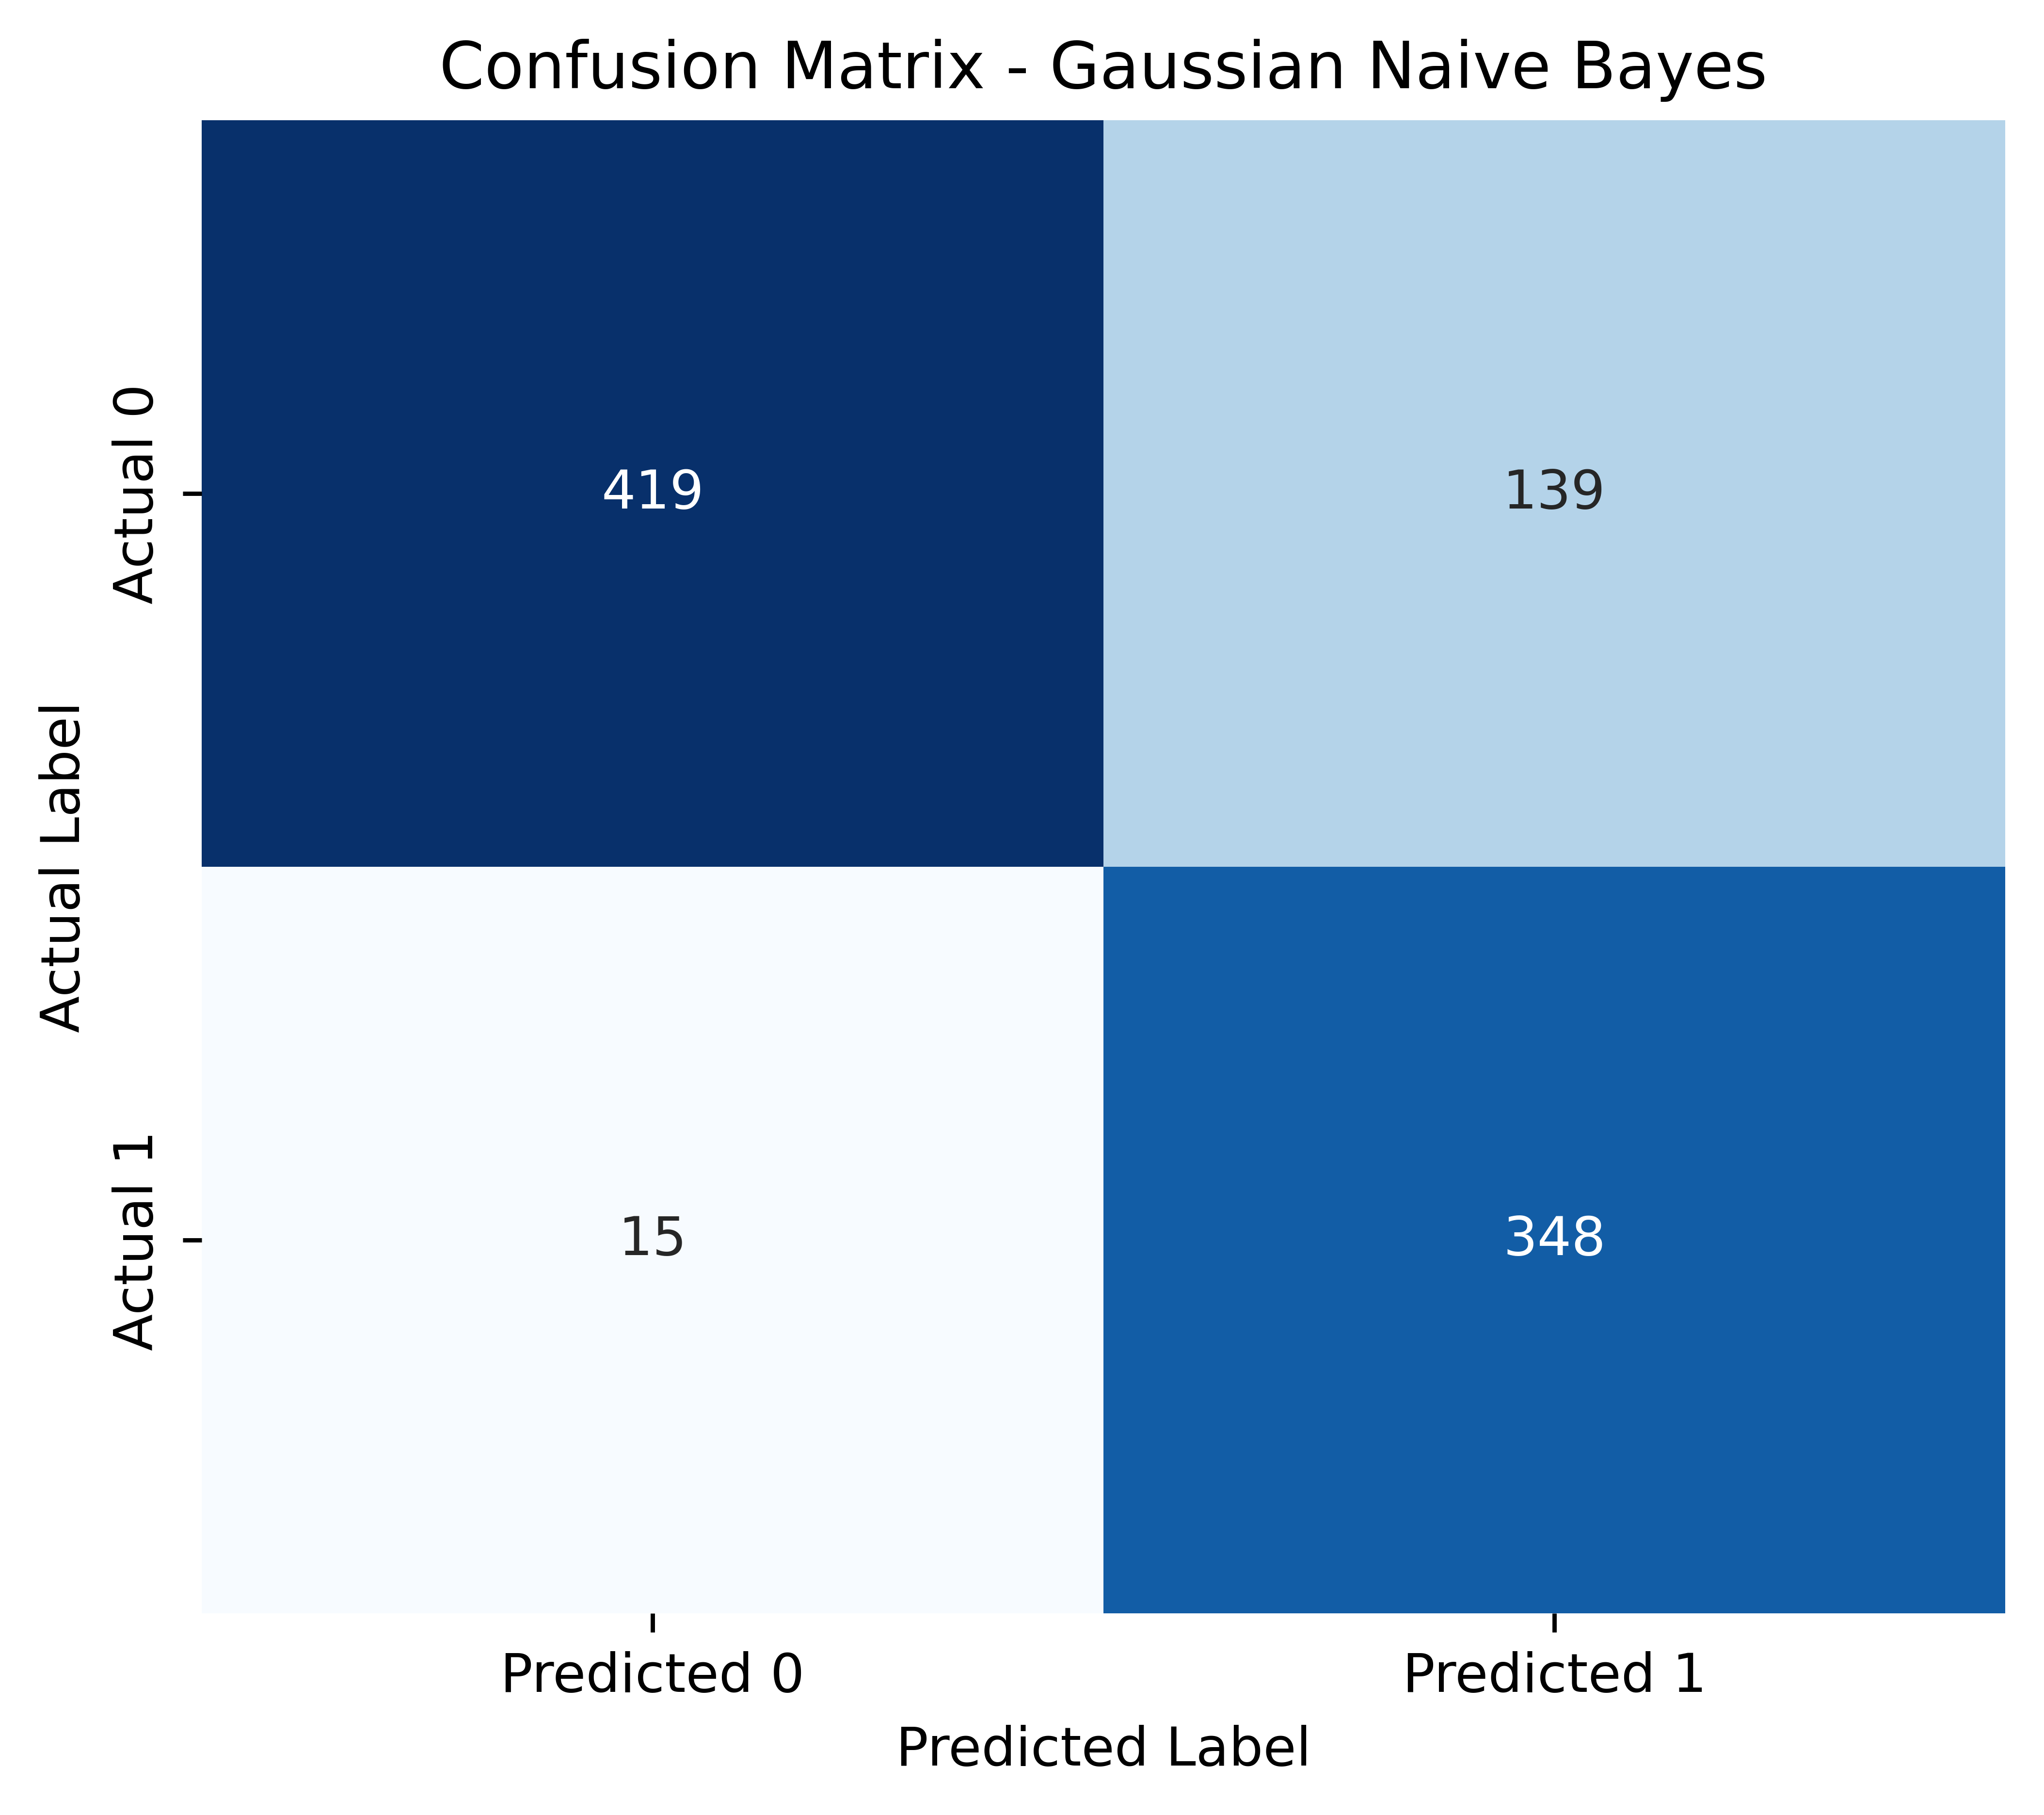

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix for Gaussian Naive Bayes
plt.figure(figsize=(6, 5), dpi=800)
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix_gaussian_nb.png') # Save as image
plt.show()

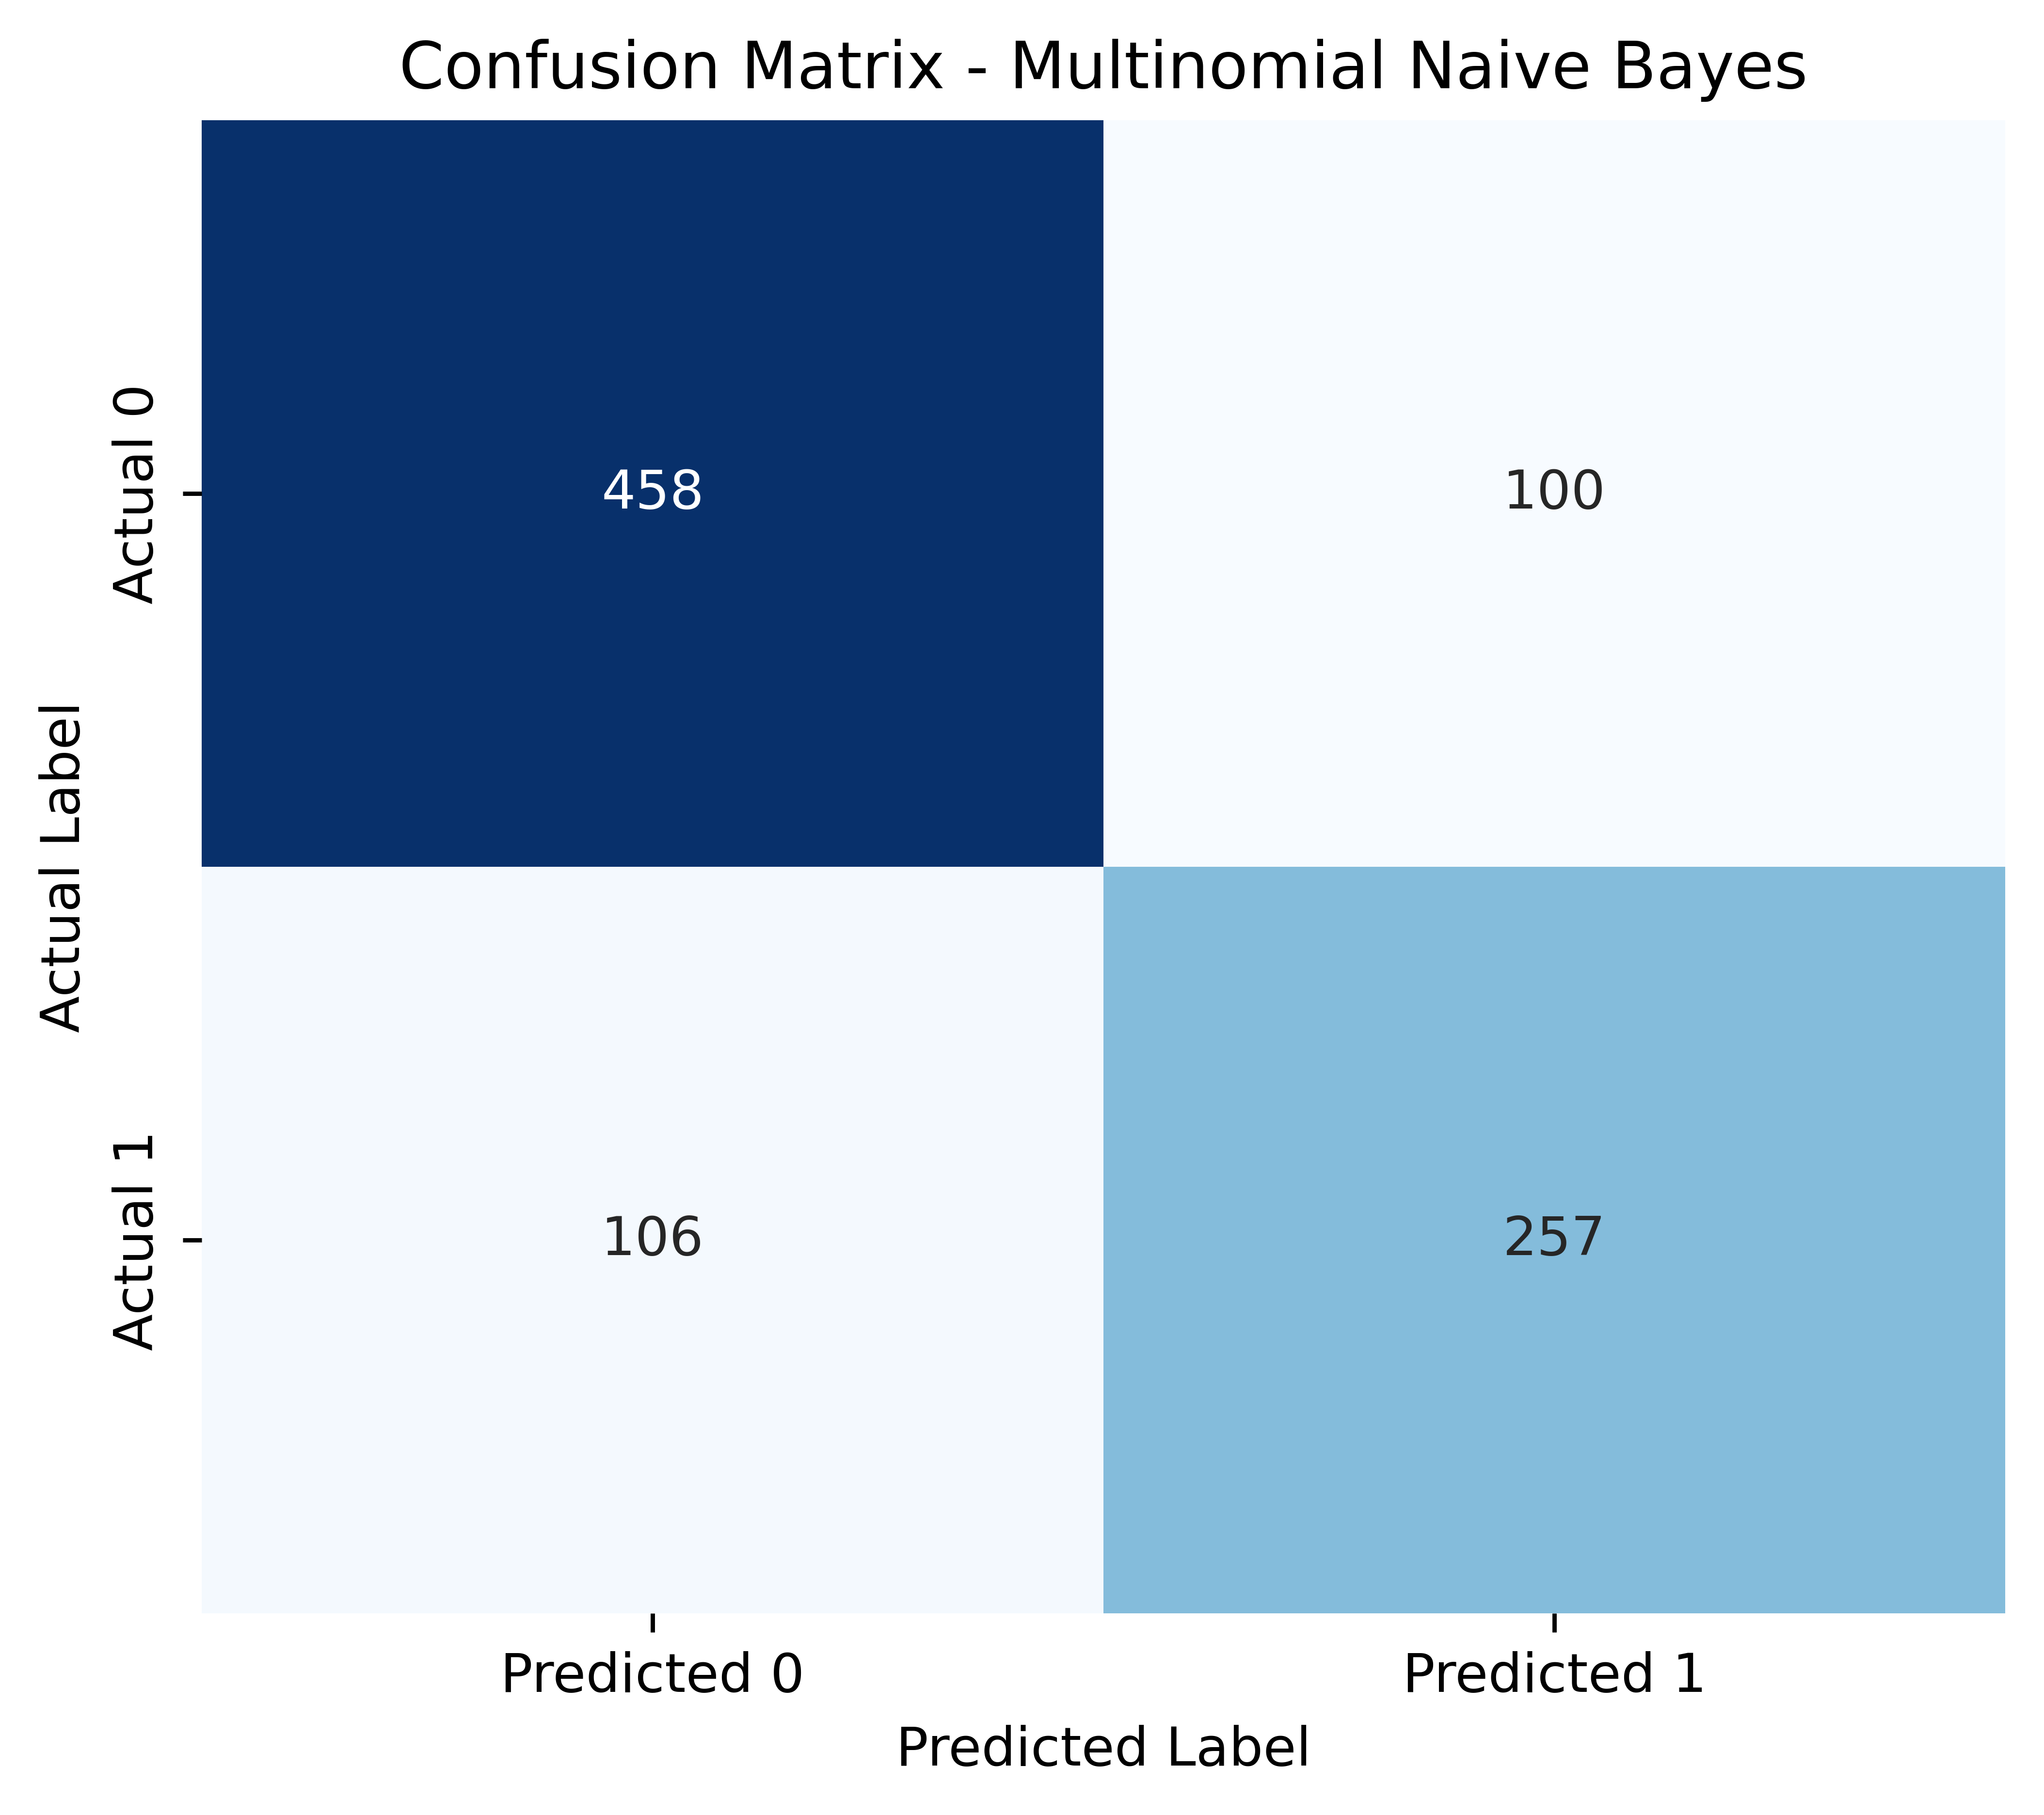

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix for Multinomial Naive Bayes
plt.figure(figsize=(6, 5), dpi=800)
sns.heatmap(cm_mnb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix_multinomial_nb.png') # Save as image
plt.show()

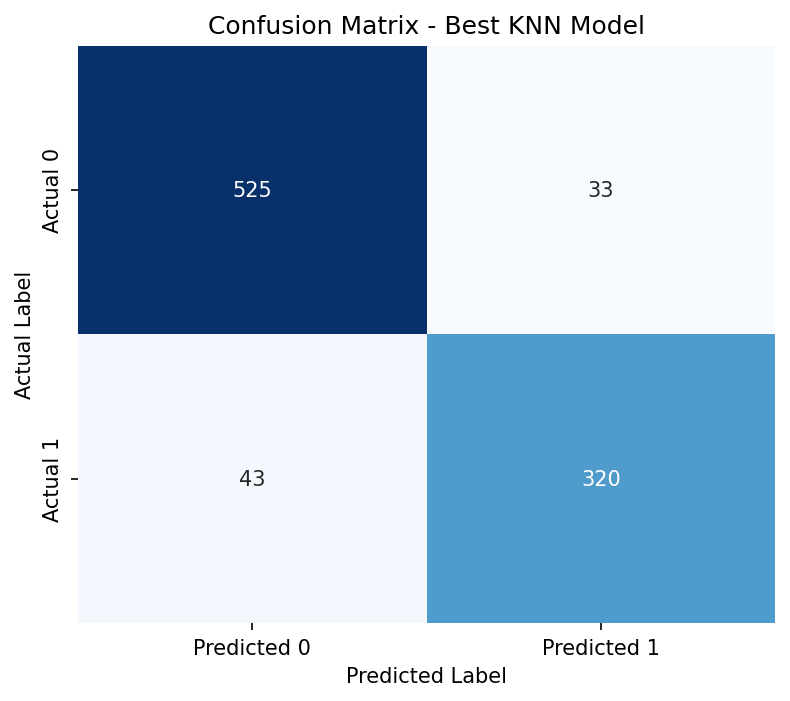

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix for Best KNN Model
plt.figure(figsize=(6, 5), dpi=150)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Best KNN Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix_best_knn.png') # Save as image
plt.show()

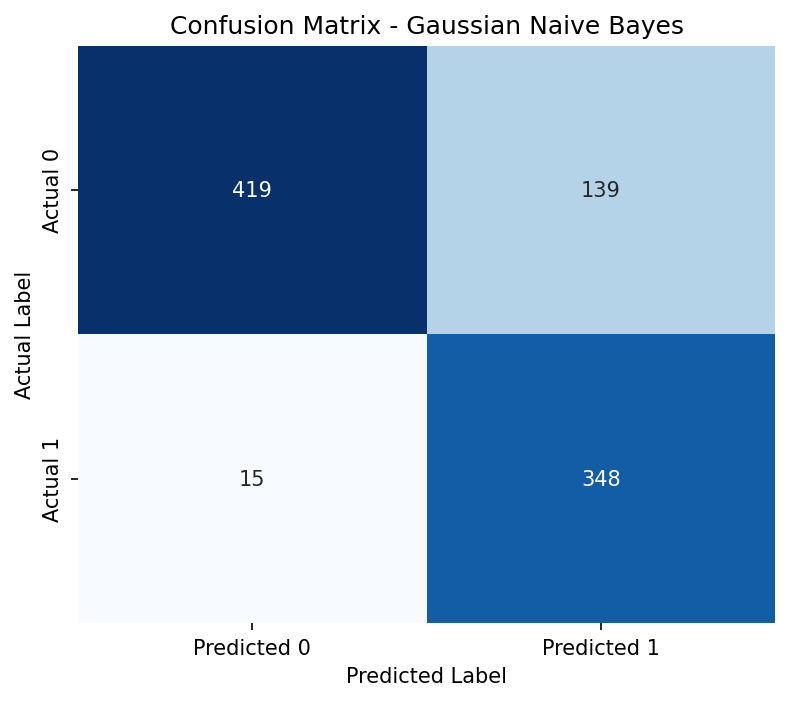

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix for Gaussian Naive Bayes
plt.figure(figsize=(6, 5), dpi=150)
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix_gaussian_nb.png') # Save as image
plt.show()

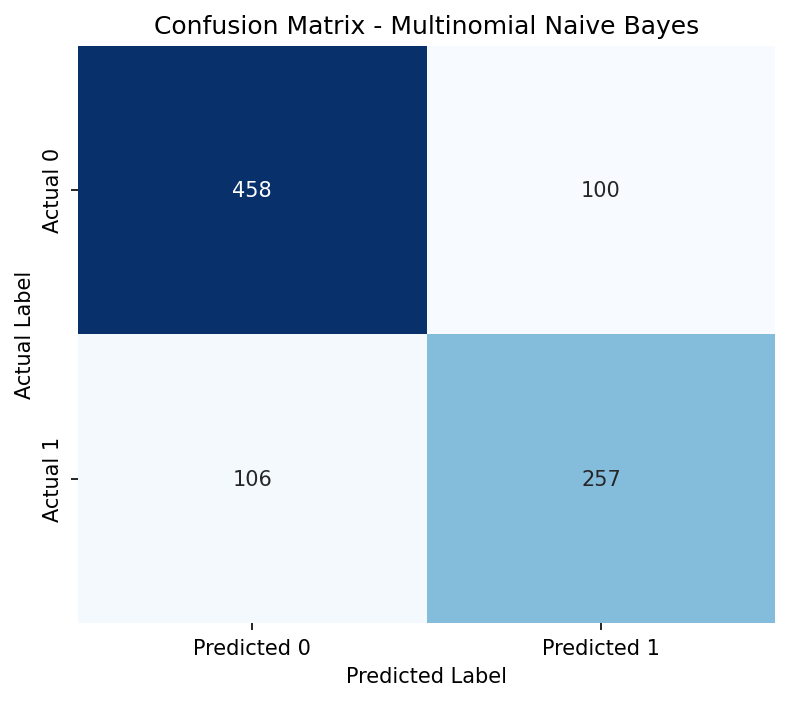

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix for Multinomial Naive Bayes
plt.figure(figsize=(6, 5), dpi=150)
sns.heatmap(cm_mnb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix_multinomial_nb.png') # Save as image
plt.show()

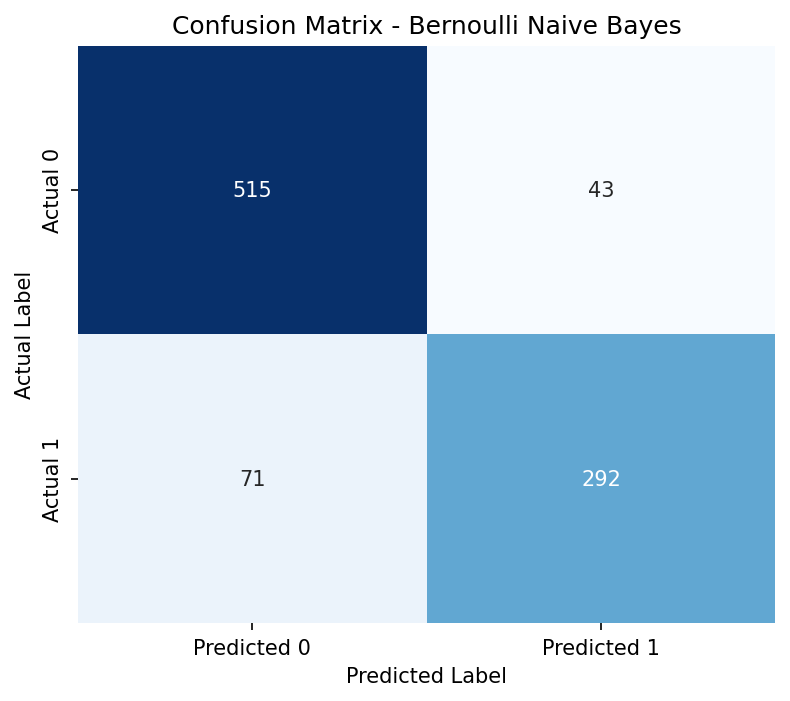

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix for Bernoulli Naive Bayes
plt.figure(figsize=(6, 5), dpi=150)
sns.heatmap(cm_bnb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Bernoulli Naive Bayes')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix_bernoulli_nb.png') # Save as image
plt.show()

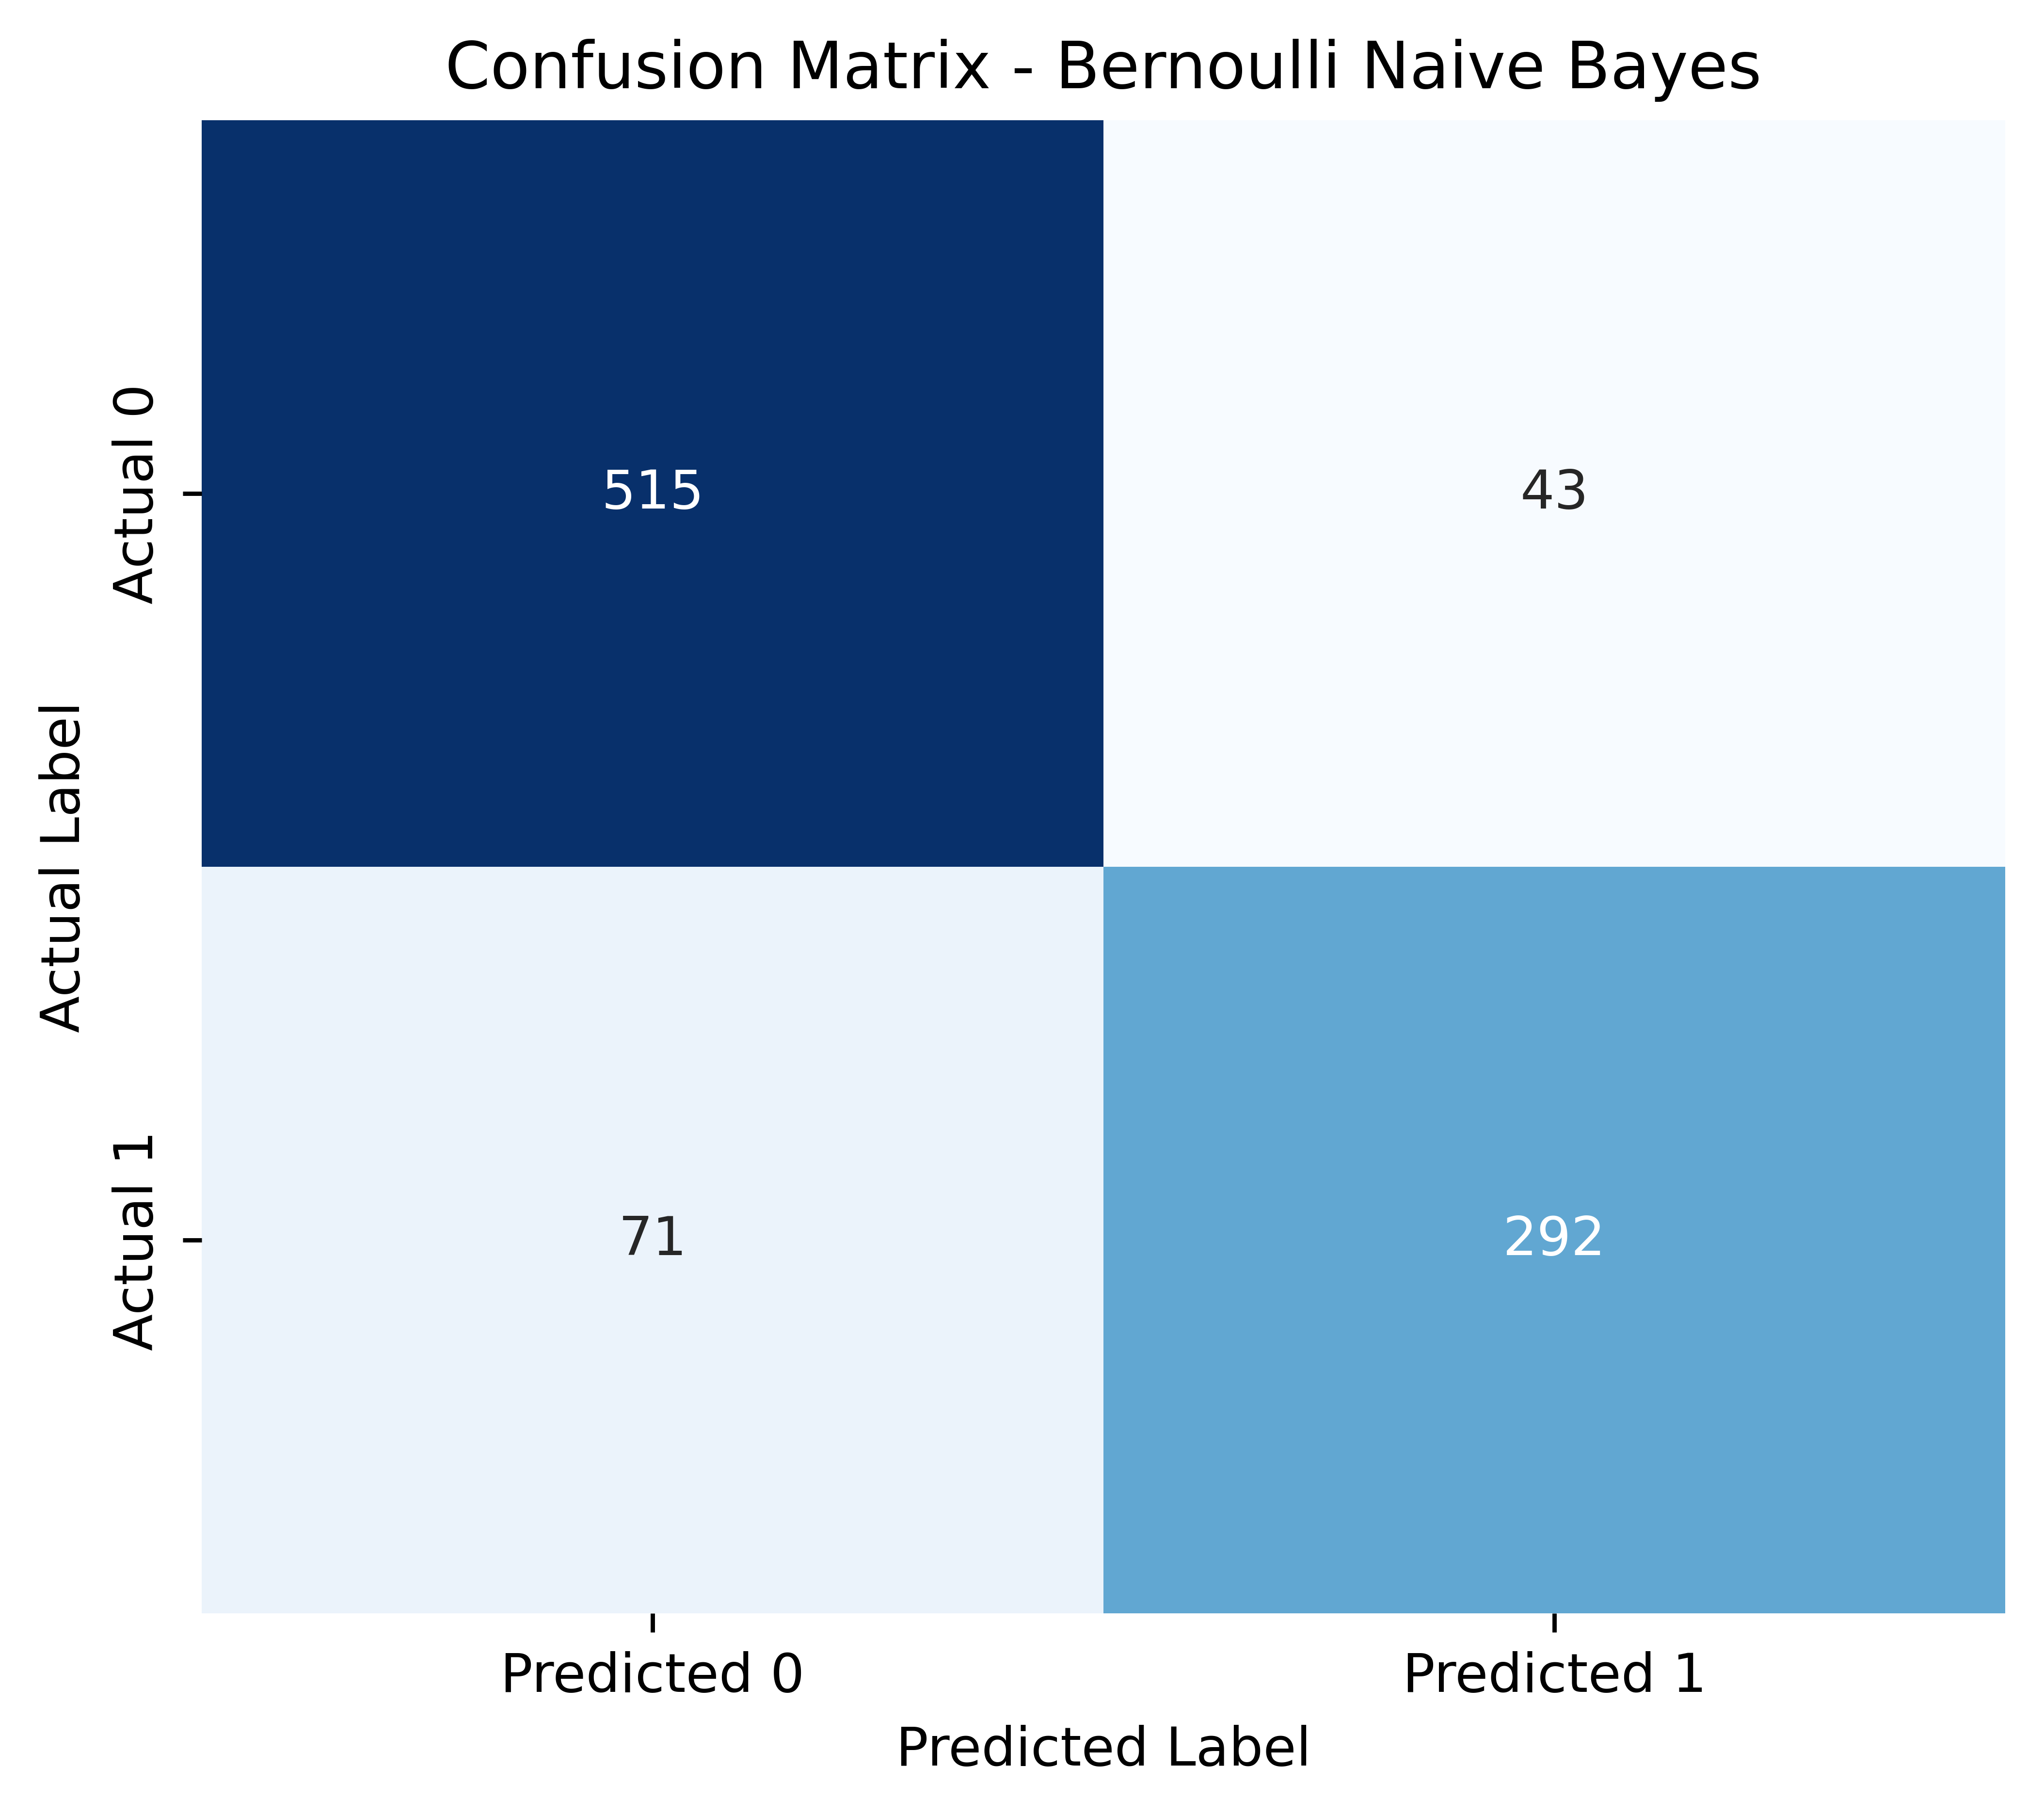

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix for Bernoulli Naive Bayes
plt.figure(figsize=(6, 5), dpi=800)
sns.heatmap(cm_bnb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Bernoulli Naive Bayes')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix_bernoulli_nb.png') # Save as image
plt.show()

**7. Train a baseline KNN Classifier**

K-NearestNeighbor


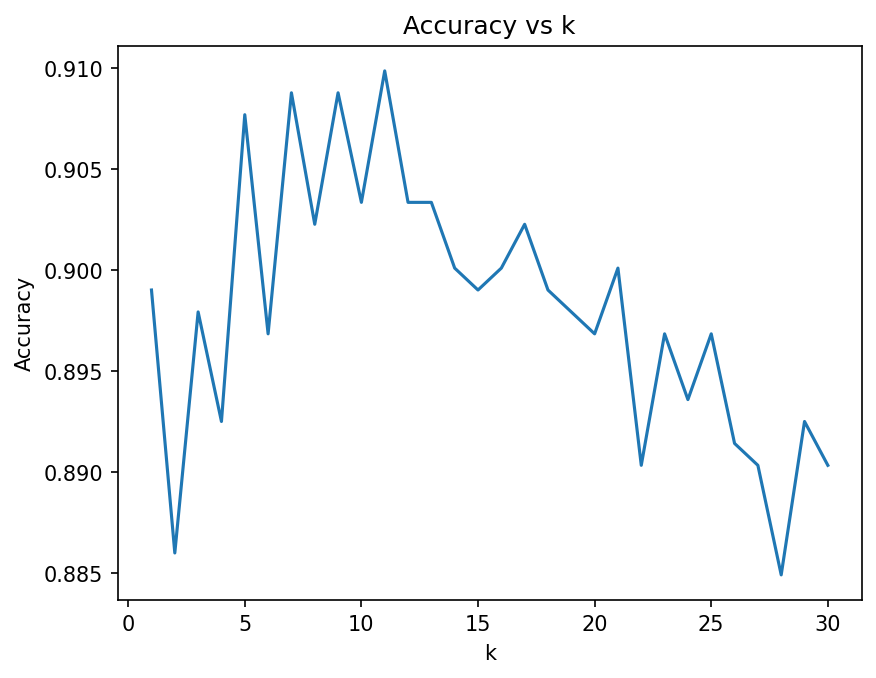

In [ ]:
print("K-NearestNeighbor")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

acc = []
for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    acc.append(knn.score(X_test_scaled,y_test))

plt.figure(dpi=150)
plt.plot(range(1,31), acc)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k")
plt.savefig('knn_accuracy_vs_k.png') # Add download option
plt.show()

K-NearestNeighbor (Updated plot with Training and Test Accuracy)


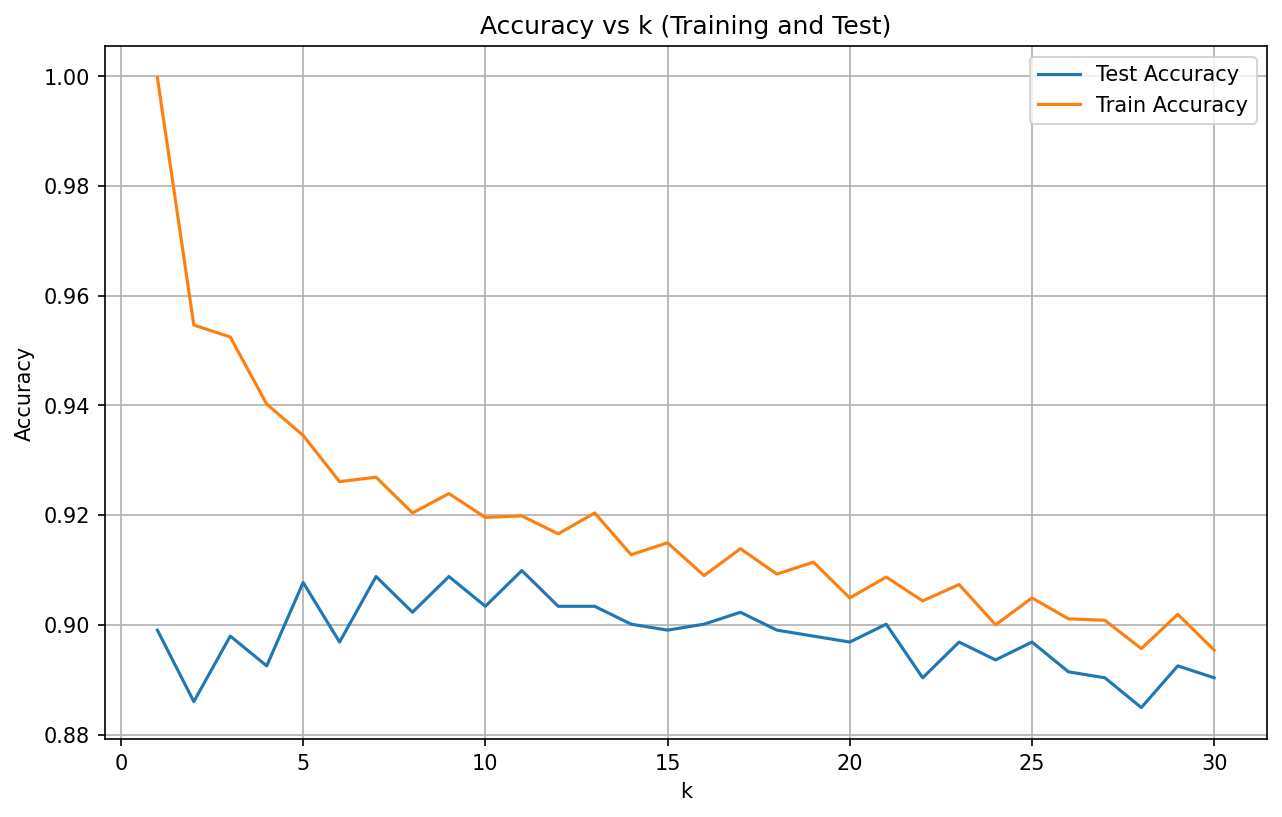

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/drive/MyDrive/spambase_csv_Kaggle.csv')

X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("K-NearestNeighbor (Updated plot with Training and Test Accuracy)")

acc_test = []
acc_train = []

for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    acc_test.append(knn.score(X_test_scaled, y_test))
    acc_train.append(knn.score(X_train_scaled, y_train))

plt.figure(figsize=(10, 6), dpi=150)
plt.plot(range(1,31), acc_test, label='Test Accuracy')
plt.plot(range(1,31), acc_train, label='Train Accuracy')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k (Training and Test)")
plt.legend()
plt.grid(True)
plt.savefig('knn_accuracy_vs_k_train_test.png') # Add download option
plt.show()

**8. Perform hyperparameter tuning for KNN using 5-Fold Cross-Validation**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

param_grid = {
    "n_neighbors": range(1, 31),
    "weights": ["uniform", "distance"],
    "algorithm": ["kd_tree", "ball_tree"]
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)
grid.fit(X_train_scaled, y_train)

random = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    random_state=42
)
random.fit(X_train_scaled, y_train)

print("Tuned KNN Results.")
print("Grid Search Best Params:", grid.best_params_)
print("Grid Search Best CV Accuracy:", grid.best_score_)

print("Random Search Best Params:", random.best_params_)
print("Random Search Best CV Accuracy:", random.best_score_)


Tuned KNN Results.
Grid Search Best Params: {'algorithm': 'kd_tree', 'n_neighbors': 15, 'weights': 'distance'}
Grid Search Best CV Accuracy: 0.9209239130434783
Random Search Best Params: {'weights': 'distance', 'n_neighbors': 15, 'algorithm': 'ball_tree'}
Random Search Best CV Accuracy: 0.9209239130434783


**9. Train optimized KNN models using KDTree and BallTree**

**10. Evaluate all models using multiple metrics**


In [ ]:
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("KDTree vs BallTree")

def evaluate_model(y_true, y_pred, train_time, pred_time):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "train_time": train_time,
        "pred_time": pred_time
    }

def run_knn(algorithm):
    knn = KNeighborsClassifier(
        n_neighbors=grid.best_params_["n_neighbors"],
        weights = grid.best_params_["weights"],
        algorithm=algorithm
    )

    start = time.time()
    knn.fit(X_train_scaled, y_train)
    train_time = time.time() - start

    start = time.time()
    y_pred = knn.predict(X_test_scaled)
    pred_time = time.time() - start

    return evaluate_model(y_test, y_pred, train_time, pred_time)

kd_metrics = run_knn("kd_tree")
ball_metrics = run_knn("ball_tree")

print("KD Tree Metrics")
for k,v in kd_metrics.items():
    print(f"{k}: {v:.4f}")
print("")
print("Ball Tree Metrics")
for k,v in ball_metrics.items():
    print(f"{k}: {v:.4f}")

KDTree vs BallTree
KD Tree Metrics
accuracy: 0.9175
precision: 0.9065
recall: 0.8815
f1_score: 0.8939
train_time: 0.0371
pred_time: 0.4627

Ball Tree Metrics
accuracy: 0.9175
precision: 0.9065
recall: 0.8815
f1_score: 0.8939
train_time: 0.0189
pred_time: 0.3753


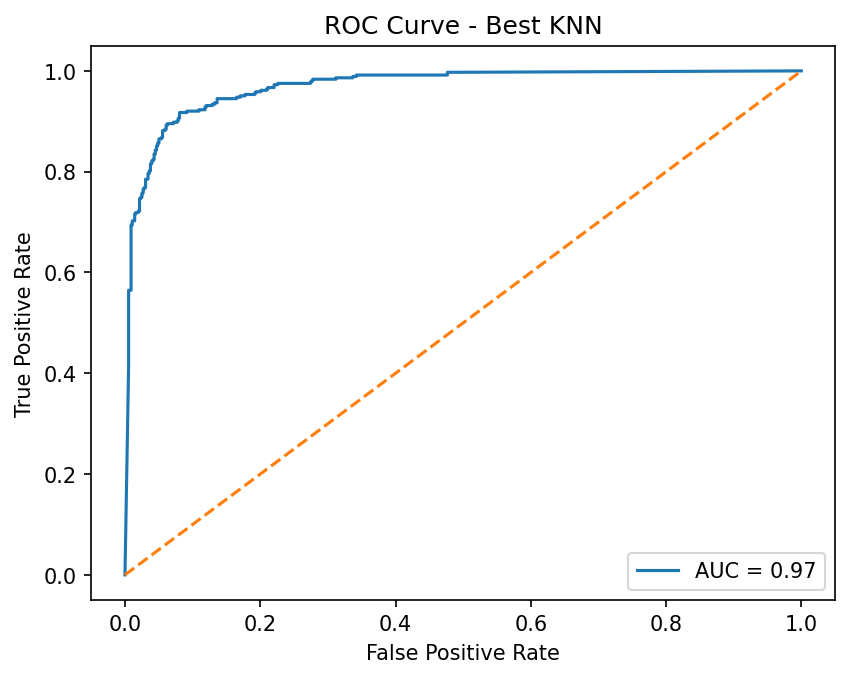

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

best_knn = grid.best_estimator_
y_prob = best_knn.predict_proba(X_test_scaled)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr,tpr)

plt.figure(dpi=150)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],"--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Best KNN")
plt.legend()
plt.savefig('roc_curve_best_knn.png') # Add download option
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# Make predictions using the best_knn model
y_pred_best_knn = best_knn.predict(X_test_scaled)

# Print the confusion matrix
print("Confusion Matrix for Best KNN Model:")
cm = confusion_matrix(y_test, y_pred_best_knn)
print(cm)


Confusion Matrix for Best KNN Model:
[[525  33]
 [ 43 320]]


In [ ]:
tn, fp, fn, tp = cm.ravel()

specificity = tn / (tn + fp)
fpr = fp / (tn + fp)

print(f"Specificity for Best KNN Model: {specificity:.4f}")
print(f"False Positive Rate for Best KNN Model: {fpr:.4f}")

Specificity for Best KNN Model: 0.9409
False Positive Rate for Best KNN Model: 0.0591
